In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plttick
import pylab
import numpy as np
import random as rd
import time
from IPython.display import clear_output
import sympy
from sympy import * # позволяет определить нулевую матрицу с помощью zeros()
from sympy.matrices import Matrix 

In [2]:
# Игровое поле.
def field_game(row, column):
    fig, ax = plt.subplots()
    ax.grid(linestyle='-', linewidth=1.5, color='black')
    plt.xticks(fontsize=0) # размер пометок на осях нулевой, чтобы их не было видно
    plt.yticks(fontsize=0)
    ax.set(xlim=(0,row), ylim=(0,column)) # обрезание поля до нужных размеров
    ax.xaxis.set_major_locator(plttick.MultipleLocator(base=1)) # задаёт сетку
    ax.yaxis.set_major_locator(plttick.MultipleLocator(base=1))
    fig.set_figheight(column)
    fig.set_figwidth(row)

# Нулевая матрица
def zero_matrix(row, column):
    return zeros(row, column)

# Начальные координаты
def cords_first(row, column, count_object):
    TryAgain_cords = True
    while TryAgain_cords:
        (x,y) = (np.random.randint(1,row+1,count_object)-0.5, np.random.randint(1,column+1,count_object)-0.5)
        cords_list=[]
        for i in range(len(x)):
            cords_list.append((x[i],y[i]))
            cords_set = set(cords_list)
            if len(cords_set) == count_object:
                TryAgain_cords = False
    return x,y



# Вводимые пользователем параметры
params_field = {
    'row': ['Введите количество строк: ', 'Строк не может быть меньше двух!'],
    'column': ['Введите количество колонок: ', "Столбцов не может быть меньше двух!"],
    't_game': ['Введите длительность работы приложения: ', 'Время не может быть меньше единицы!']}
def input_params_field(param): # param = row (количество строк), column (количество столбцов), t_game (время игры)
    TryAgain = True
    while TryAgain:
        params = input(f'{(params_field[param])[0]}')
        try:
            params = int(params)
        except (ValueError, KeyError):
            print('Введите целое число!')
        try:
            if params > 1:
                TryAgain = False
            else:
                print(f'{(params_field[param])[1]}')
        except:
            pass
    return params

# Скорость (сколько секунд выжидается перед следующей итерацией)
def input_speed():
    TryAgain_speed = True
    while TryAgain_speed:
        try:
            speed = float(input('Введите длительность игровой секунды: '))
        except ValueError:
            print ('Введите целое число!')
        try:
            if speed > 0:
                TryAgain_speed = False
            else:
                print("Секунда не может быть нулевой!")
        except:
            pass
    return speed


def max_energy_grass_f(time_grass): # максимальная энергия травы, ограничена 5
    max_energy_grass = int(time_grass/2)
    if max_energy_grass >= 5:
        max_energy_grass = 5
    return max_energy_grass

def change_energy_grass(n_row,n_column,max_energy_grass,m_energy_grass,mark_size_grass): # изменение энергии и размера маркера
    for j in range(len(n_row)):
        if m_energy_grass[n_row[j], n_column[j]] in range (1,max_energy_grass):
            m_energy_grass[n_row[j], n_column[j]] += 1
            if max_energy_grass in range(3):
                mark_size_grass[n_row[j], n_column[j]] += 150 # разные, чтобы маркеры не были слишком маленькими или огромными
            elif max_energy_grass == 3:
                mark_size_grass[n_row[j], n_column[j]] += 100
            elif max_energy_grass == 4:
                mark_size_grass[n_row[j], n_column[j]] += 90
            else:
                mark_size_grass[n_row[j], n_column[j]] += 80
        else:
            pass

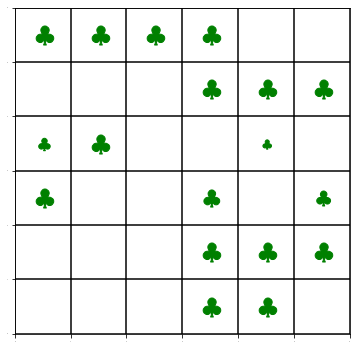

Matrix([[0, 0, 5, 2, 0, 5], [0, 0, 0, 5, 0, 5], [0, 0, 0, 0, 0, 5], [5, 5, 4, 0, 5, 5], [5, 5, 0, 1, 5, 0], [0, 5, 3, 0, 5, 0]])
Ура, почва для кроликов готова!


In [3]:
def game_vrode_rabotaet(row=5,column=5,speed=1.5,t_game=20):
    TryAgain_row = True
    
    row = input_params_field('row')
    column = input_params_field('column')
    t_game = input_params_field('t_game')
    speed = input_speed()
    
    time_grass = int(row*column*0.5) # время жизни травы; трава занимает 0.5 поля, потом сделаю настраиваемым
    m_energy_grass = zero_matrix(row,column) # матрица энергии травы, сначала нулевой
    max_energy_grass = max_energy_grass_f(time_grass)
    
    x,y = cords_first(row,column,time_grass) # координаты травы
    n_row, n_column = [], []
    for i in range(len(x)):
        n_row.append(int(x[i]-0.5))
    for j in range(len(y)):
        n_column.append(int(y[j]-0.5)) # списки для номеров строк и колонок для матрицы энергии травы
    
    step_1 = 0
    step_2 = 0
    mark_size_grass = zero_matrix(row,column)
    
    
    for i in range(1,t_game):
        clear_output(wait=True) # при каждой итерации цикла очищает вывод
        
        if i <= time_grass:
            
            # подкрутка изменяемой энергии травы_1
            change_energy_grass(n_row,n_column,max_energy_grass,m_energy_grass,mark_size_grass)
            
            m_energy_grass[n_row[i-1], n_column[i-1]] = 1 # (i-1), т.к. i изначально = 1, но индексы списков идут от нуля
            mark_size_grass[n_row[i-1], n_column[i-1]] = 100
        
        
        if i >= time_grass + 1:
            m_energy_grass[n_row[step_1], n_column[step_1]] = 0 # зануление ячейки умершей травы
            mark_size_grass[n_row[step_1], n_column[step_1]] = 0
           
            TryAgain = True
            while TryAgain:
                x[step_1] = np.random.randint(1,row+1)-0.5      # переопределение координат, номеров ячеек,
                y[step_1] = np.random.randint(1,column+1)-0.5   # пока не появится уникальный элемент...
                n_row[step_1] = int(x[step_1]-0.5)
                n_column[step_1] = int(y[step_1]-0.5)
                
                if m_energy_grass[n_row[step_1], n_column[step_1]] == 0: # ...т.е. пока матричная ячейка не будет нулевой
                    TryAgain = False
                    mark_size_grass[n_row[step_1], n_column[step_1]] = 0
            
            # подкрутка изменяемой энергии травы_2
            change_energy_grass(n_row,n_column,max_energy_grass,m_energy_grass,mark_size_grass)
            
            m_energy_grass[n_row[step_1], n_column[step_1]] = 1 # определившись с уникальной координатой, задаётся матричный элемент
            mark_size_grass[n_row[step_1], n_column[step_1]] = 100
            
            step_1 += 1
            if step_1 >= time_grass: # обнуляется при достижении time_grass, начинает отсчёт заново,
                step_1 = 0           # чтобы индексы у списков были в допустимых пределах
        
        
        




        # отображаемое
        field_game(row,column) # игровое поле
        for j in range(len(x[:i])):
                plt.scatter(x[j],y[j], color='green', 
                    s=int(mark_size_grass[n_row[j], n_column[j]]),
                    marker=r'$\clubsuit$')
        plt.show()

        print(m_energy_grass) # показывает матрицу энергии травы, потом не будет отображаться, это для проверки
        
        
        time.sleep(speed) # выжидание speed секунд перед новой итерацией
        
        if i == t_game - 1:
            print('Ура, почва для кроликов готова!') # потом тоже удалится
        

game_vrode_rabotaet()